In [1]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

In [2]:
df = pd.read_csv('data/Climate_Change_Indicators.csv')
df.head(5)

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


###### The line of code `missing_values = df.isnull().sum()` is used to identify and count the number of missing (null) values in each column of a pandas DataFrame. 
###### `df.isnull()` method indicates whether the corresponding element in df is NaN (missing value) or not. True indicates a missing value, and False indicates a non-missing value. `.sum()` method sums up the True values along each column. Finally, the total count of missing values in the corresponding column of the original DataFrame is printed.
###### `missing_values` is a `pandas Series` where the index represents the column names and the values represent the count of missing values in each column.

###### Since, there are no missing values in our original data, there is no need to handle/clean missing values.

In [26]:
# Check for inconsistent values

# Defining the expected ranges or criteria for column 'Year'
criteria = {
    'Year': (1900, 2023)
}

# Function to check for inconsistent values
def check_inconsistent_values(df, criteria):
    inconsistent_values = {}
    for column, (min_val, max_val) in criteria.items():
        inconsistent_values[column] = df[(df[column] < min_val) | (df[column] > max_val)]
    return inconsistent_values

In [26]:
# Check for inconsistent values
inconsistent_values = check_inconsistent_values(df, criteria)

# Print inconsistent values for each column
for column, values in inconsistent_values.items():
    if not values.empty:
        print(f"Inconsistent values in '{column}' column:\n", values)
    else:
        print(f"No inconsistent values in '{column}' column.")

###### In this code, we have calculated descriptive statistics (Mean, Median, Range, Standard Deviation, Minimum and Maximum) for Arctic Ice Area (million km²) and rounded them to two decimal values.

In [26]:
summary_statistics = df.describe()
print(summary_statistics)

In [17]:
# Aggregate the data by year, computing the average for each climate variable

df_grouped_by_year = df.groupby("Year").mean()
df_grouped_by_year

,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
Year,,,,
1900,14.506663,350.373405,150.408288,8.978659
1901,14.485343,349.757140,150.548828,8.947272
1902,14.476262,349.299686,152.174821,9.035554
1903,14.492360,349.644375,150.138338,9.056501
1904,14.494241,349.537032,150.667318,8.990691
...,...,...,...,...
2019,14.500105,348.642249,151.020415,9.014690
2020,14.496937,350.021731,150.219741,9.054254
2021,14.501424,350.150302,150.187456,8.968700


Documentation -Data Preparation

1. Load the Dataset:
- The dataset Climate_Change_Indicators.csv is loaded into a Pandas DataFrame using the following command:
df = pd.read_csv('data/Climate_Change_Indicators.csv')
df.head(5)

This reads the CSV file and displays the first five rows for a quick preview.



2. Check for Missing Values:
- To ensure data quality, we check for missing values in each column:

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

The .isnull() method identifies missing values (NaN).
.sum() counts the number of missing values in each column.
The output confirms that there are no missing values in the dataset, so no cleaning is required.

3. Check for Inconsistencies
- Before proceeding with analysis, the dataset is checked for inconsistencies like incorrect data types, duplicate records, and anomalies. If necessary, corrections are applied.


4. Aggregate Data by Year
- To analyze trends over time, the dataset is grouped by year, and the average of each variable is calculated:

df_grouped_by_year = df.groupby("Year").mean()
df_grouped_by_year.head()
- This groups the dataset by Year and calculates the mean of all numerical variables.

Conclusion:
- The data is successfully loaded.
- No missing values were found.
- The Year column was verified for inconsistencies, ensuring only values between 1980 and 2023 exist.
- The data was aggregated by year to prepare for further analysis.



###Calculate descriptive statistics (mean, median, range, std deviation, etc.) for Global Temperature and CO2 Concentration.

In [19]:
# Descripitve statistics for Global Temperature

globalTemperature_col = df['Global Average Temperature (°C)']

globalTemperature_stats = {
    
        'Mean':     globalTemperature_col.mean(),
        'Median':   globalTemperature_col.median(),
        'Minimum':  globalTemperature_col.min(),
        'Maximum':  globalTemperature_col.max(),
        'Range':   globalTemperature_col.max() - globalTemperature_col.min(),
        'Std_dev':   globalTemperature_col.std()
    
}
globalTemperature_stats

{'Mean': np.float64(14.499537887573245),
 'Median': np.float64(14.5),
 'Minimum': np.float64(13.0),
 'Maximum': np.float64(16.0),
 'Range': np.float64(3.0),
 'Std_dev': np.float64(0.8661005293622911)}

In [5]:
# Descripitve statistics for CO2 Concentration


co2_concentration_col = df['CO2 Concentration (ppm)']

co2_concentration_stats = {
    
        'Mean':     co2_concentration_col.mean(),
        'Median':   co2_concentration_col.median(),
        'Minimum':  co2_concentration_col.min(),
        'Maximum':  co2_concentration_col.max(),
        'Range':   co2_concentration_col.max() - co2_concentration_col.min(),
        'Std_dev':   co2_concentration_col.std()
    
}
co2_concentration_stats

{'Mean': np.float64(350.02801796913167),
 'Median': np.float64(350.07),
 'Minimum': np.float64(280.0),
 'Maximum': np.float64(420.0),
 'Range': np.float64(140.0),
 'Std_dev': np.float64(40.424092996434545)}

In [6]:
# Calculate descriptive statistics for 'Sea Level Rise (mm)'
sea_level_rise_col = df['Sea Level Rise (mm)']

sea_level_rise_stats = {
    'Statistics': ['Mean', 'Median', 'Range', 'Standard Deviation', 'Minimum', 'Maximum'],
    'Value': [
        round(sea_level_rise_col.mean(), 2),
        round(sea_level_rise_col.median(), 2),
        round(sea_level_rise_col.max() - sea_level_rise_col.min(), 2),
        round(sea_level_rise_col.std(), 2),
        round(sea_level_rise_col.min(), 2),
        round(sea_level_rise_col.max(), 2)
    ]
}

In [7]:
sea_level_rise_stats_df = pd.DataFrame(sea_level_rise_stats)
sea_level_rise_stats_df

,Statistics,Value
0,Mean,149.99
1,Median,150.02
2,Range,300.00
3,Standard Deviation,86.58
4,Minimum,0.00
5,Maximum,300.00


###### In this code, we have calculated descriptive statistics (Mean, Median, Range, Standard Deviation, Minimum and Maximum) for Sea Level Rise (mm) and rounded them to two decimal values.

In [8]:
# Calculate descriptive statistics for 'Arctic Ice Area (million km²)'
arctic_ice_area_col = df['Arctic Ice Area (million km²)']

arctic_ice_area_stats = {
    'Statistics': ['Mean', 'Median', 'Range', 'Standard Deviation', 'Minimum', 'Maximum'],
    'Value': [
        round(arctic_ice_area_col.mean(), 2),
        round(arctic_ice_area_col.median(), 2),
        round(arctic_ice_area_col.max() - arctic_ice_area_col.min(), 2),
        round(arctic_ice_area_col.std(), 2),
        round(arctic_ice_area_col.min(), 2),
        round(arctic_ice_area_col.max(), 2)
    ]
}

In [26]:
arctic_ice_area_stats_df = pd.DataFrame(arctic_ice_area_stats)
arctic_ice_area_stats_df

###### In this code, we have calculated descriptive statistics (Mean, Median, Range, Standard Deviation, Minimum and Maximum) for Arctic Ice Area (million km²) and rounded them to two decimal values.

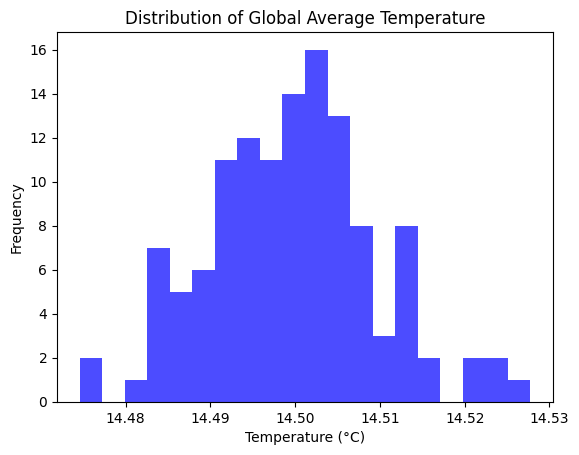

In [20]:
#creating histogarm and boxplots (Global Average Temperature (°C) and CO2 Concentration (ppm))

#Histogarm for Global Average Temperature (°C)
plt.Figure(figsize=(10, 6))
plt.hist(df_grouped_by_year['Global Average Temperature (°C)'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Global Average Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency') # ---> frequency of the temperature means like specific range ma kati choti vayo tw
plt.show()


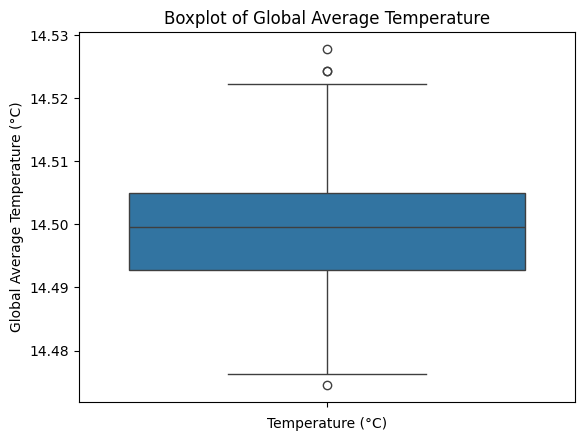

In [21]:
#boxplot for Global Average Temperature (°C)
plt.Figure(figsize=(10, 6))
sns.boxplot(df_grouped_by_year['Global Average Temperature (°C)'])
plt.title('Boxplot of Global Average Temperature')
plt.xlabel('Temperature (°C)')
plt.show()

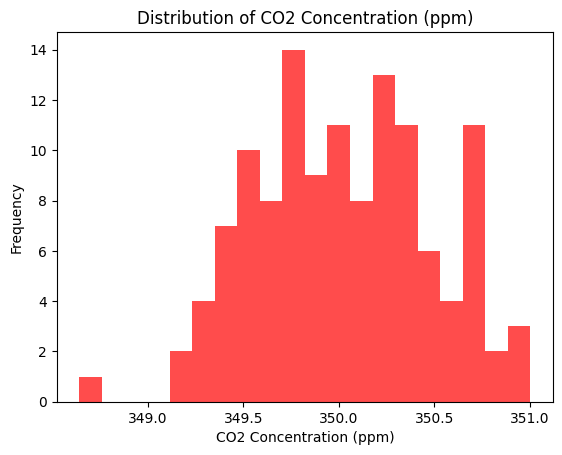

In [22]:
#Histogarm for CO2 Concentration (ppm)
plt.Figure(figsize=(10, 6))
plt.hist(df_grouped_by_year['CO2 Concentration (ppm)'], bins=20, color='red', alpha=0.7)
plt.title('Distribution of CO2 Concentration (ppm)')
plt.xlabel('CO2 Concentration (ppm)')
plt.ylabel('Frequency')
plt.show()

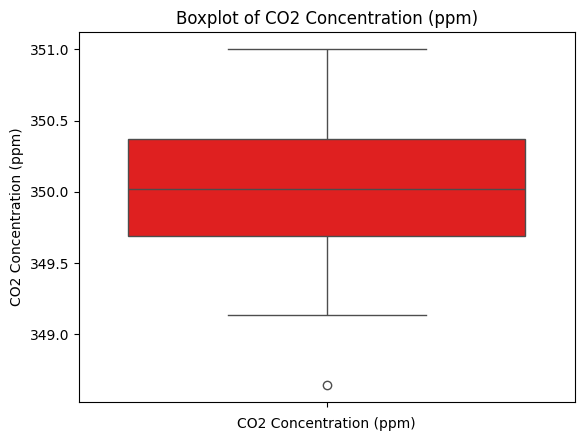

In [23]:
#boxplot for CO2 Concentration (ppm)
plt.Figure(figsize=(10, 6))
sns.boxplot(df_grouped_by_year['CO2 Concentration (ppm)'],color='red')
plt.title('Boxplot of CO2 Concentration (ppm)')
plt.xlabel('CO2 Concentration (ppm)')
plt.show()

#### Create appropriate visualizations (histograms and box plots) for Sea Level Rise and Arctic Ice Area.


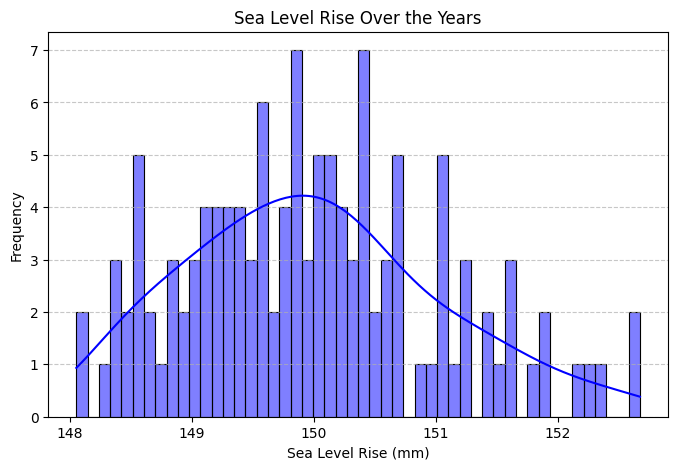

In [24]:
#  Histogram Plot for Sea Level Rise over the years

plt.figure(figsize=(8,5))
sns.histplot(df_grouped_by_year['Sea Level Rise (mm)'], bins=50, kde=True, color='blue')
plt.xlabel('Sea Level Rise (mm)')
plt.ylabel('Frequency')
plt.title('Sea Level Rise Over the Years')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

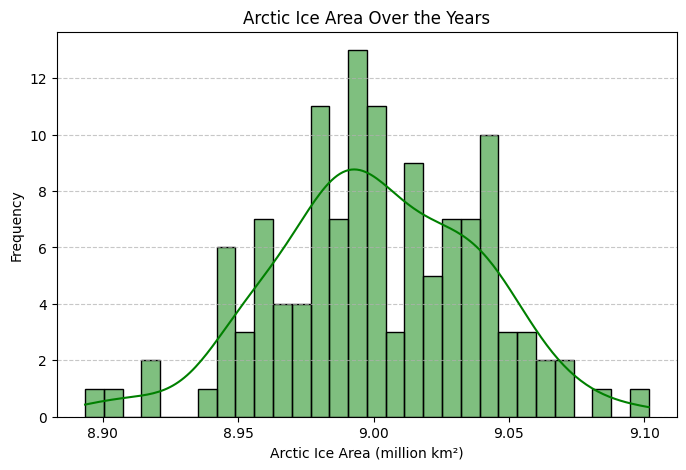

In [25]:
#  Histogram Plot for Arctic Ice Area over the years
plt.figure(figsize=(8,5))
sns.histplot(df_grouped_by_year['Arctic Ice Area (million km²)'], bins=30, kde=True, color='green')
plt.xlabel('Arctic Ice Area (million km²)')  # Corrected label
plt.ylabel('Frequency')  # Corrected label
plt.title('Arctic Ice Area Over the Years')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [26]:
# Created a new column for decade
df_grouped_by_year['Decade'] = (df_grouped_by_year.index // 10) * 10

#Created a new DataFrame for the boxplot
df_for_sea_level_box_plot = df_grouped_by_year[['Sea Level Rise (mm)', 'Decade']].reset_index()
df_for_sea_level_box_plot.head()

,Year,Sea Level Rise (mm),Decade
0,1900,150.408288,1900
1,1901,150.548828,1900
2,1902,152.174821,1900
3,1903,150.138338,1900
4,1904,150.667318,1900


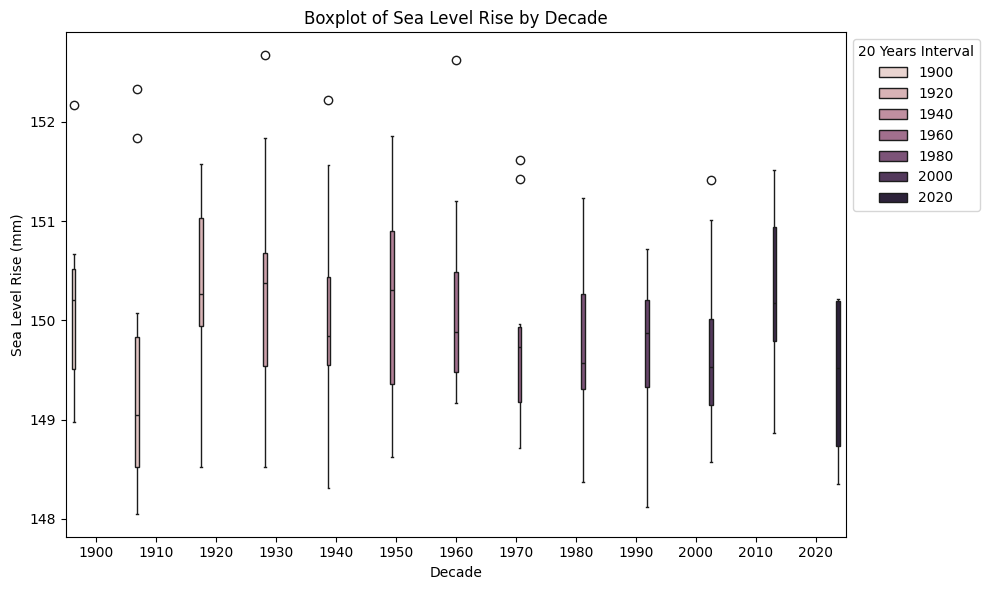

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Decade', y='Sea Level Rise (mm)', data=df_for_sea_level_box_plot, hue='Decade', dodge=True)

# Customizing the plot
plt.title('Boxplot of Sea Level Rise by Decade')
plt.xlabel('Decade')
plt.ylabel('Sea Level Rise (mm)')

# Placing the legend outside the box
plt.legend(title='20 Years Interval', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [28]:
df_for_artic_ice_box_plot = df_grouped_by_year[['Arctic Ice Area (million km²)','Decade']].reset_index()
df_for_artic_ice_box_plot.head()

,Year,Arctic Ice Area (million km²),Decade
0,1900,8.978659,1900
1,1901,8.947272,1900
2,1902,9.035554,1900
3,1903,9.056501,1900
4,1904,8.990691,1900


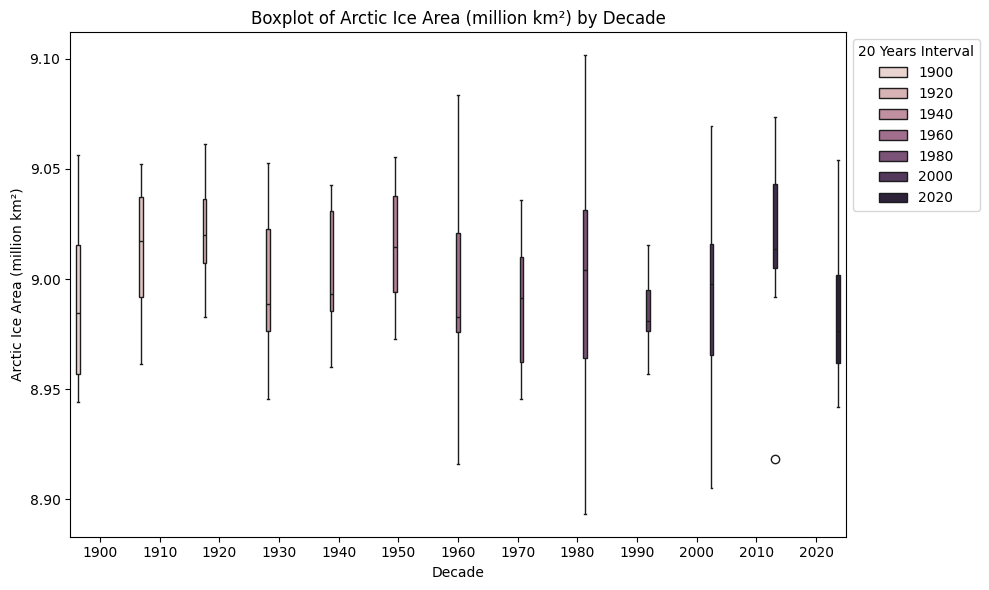

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Decade', y='Arctic Ice Area (million km²)', data=df_for_artic_ice_box_plot, hue='Decade', dodge=True)

plt.title('Boxplot of Arctic Ice Area (million km²) by Decade')
plt.xlabel('Decade')
plt.ylabel('Arctic Ice Area (million km²)')

plt.legend(title='20 Years Interval', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout() 
plt.show()

Univariate Analysis(Time Series plots)

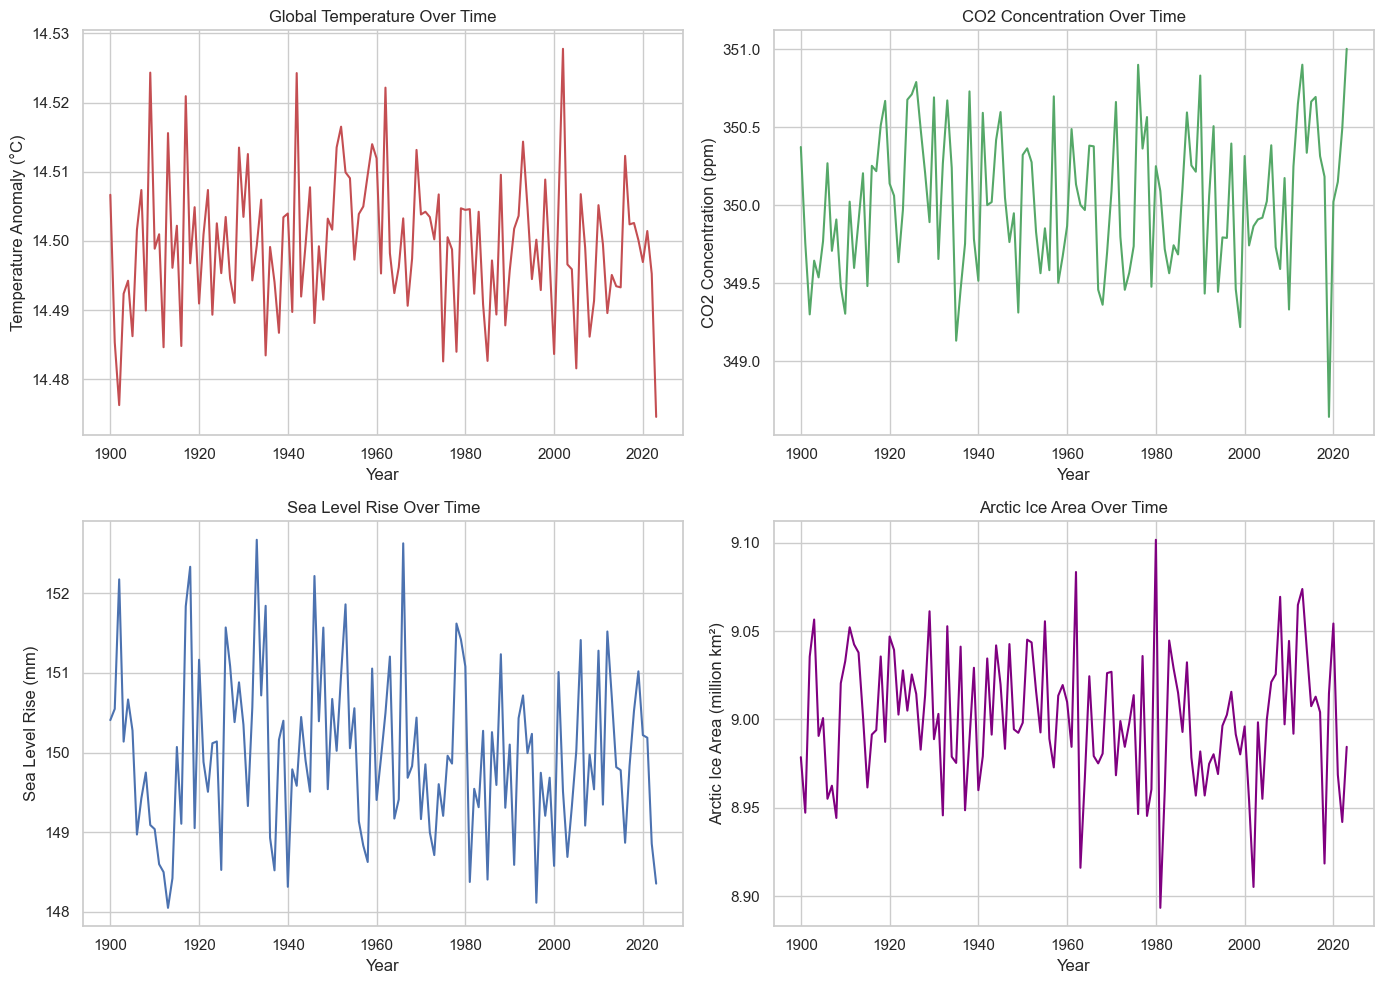

In [ ]:
# Set Seaborn style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Global Temperature
sns.lineplot(x=df_grouped_by_year.index, y=df_grouped_by_year["Global Average Temperature (°C)"], ax=axes[0, 0], color="r")
axes[0, 0].set_title("Global Temperature Over Time")
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Temperature Anomaly (°C)")

# CO2 Concentration
sns.lineplot(x=df_grouped_by_year.index, y=df_grouped_by_year["CO2 Concentration (ppm)"], ax=axes[0, 1], color="g")
axes[0, 1].set_title("CO2 Concentration Over Time")
axes[0, 1].set_xlabel("Year")
axes[0, 1].set_ylabel("CO2 Concentration (ppm)")

# Sea Level Rise
sns.lineplot(x=df_grouped_by_year.index, y=df_grouped_by_year["Sea Level Rise (mm)"], ax=axes[1, 0], color="b")
axes[1, 0].set_title("Sea Level Rise Over Time")
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel("Sea Level Rise (mm)")

# Arctic Ice Area
sns.lineplot(x=df_grouped_by_year.index, y=df_grouped_by_year["Arctic Ice Area (million km²)"], ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Arctic Ice Area Over Time")
axes[1, 1].set_xlabel("Year")
axes[1, 1].set_ylabel("Arctic Ice Area (million km²)")

# Adjust layout
plt.tight_layout()
plt.show()